In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pathlib import Path

pd.set_option("display.max_columns", 500)

In [2]:
sampledf = pd.read_csv(Path("data", "sample.csv"), index_col=0)

/Users/rad/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/rad/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df = sampledf.copy()

In [4]:
df.head(3)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
8588549,1932288412,WARDEN,DAVID,R,MD,M,I,3100 CHANNING WAY,NaN,IDAHO FALLS,834047533,ID,US,Diagnostic Radiology,Y,O,76700,Ultrasound of abdomen,N,30.0,30,30,98.726000,268.733333,72.139000,2012
178269,1013992643,DETRANA,PHILIP,M,M.D.,M,I,2414 KOHLER MEMORIAL DR,NaN,SHEBOYGAN,530813129,WI,US,Pulmonary Disease,Y,O,36415,Insertion of needle into vein for collection o...,N,46.0,23,46,3.000000,3.000000,3.000000,2012
4234612,1467425520,ROSO,GEORGE,NaN,M.D.,M,I,255 S DOBSON RD,SUITE 1,CHANDLER,852246231,AZ,US,Family Practice,Y,O,90656,"Vaccine for influenza injection into muscle, p...",Y,11.0,11,11,12.389091,25.000000,11.261818,2012


In [5]:
df.shape

(1200000, 26)

In [6]:
# 64+489 = 553
((df.nppes_provider_country != 'US') | (df.medicare_participation_indicator == 'N')).sum()

553

In [7]:
df = df.loc[(df.nppes_provider_country == 'US') & (df.medicare_participation_indicator == 'Y')]
dropcols = ["nppes_provider_country", "medicare_participation_indicator"]
df = df.drop(dropcols, axis=1)

In [8]:
df.shape

(1199447, 24)

In [21]:
df.head(10)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,provider_type,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
8588549,1932288412,WARDEN,DAVID,R,MD,M,I,3100 CHANNING WAY,NaN,IDAHO FALLS,834047533,ID,Diagnostic Radiology,O,76700,Ultrasound of abdomen,N,30.0,30,30,98.726000,268.733333,72.139000,2012
178269,1013992643,DETRANA,PHILIP,M,M.D.,M,I,2414 KOHLER MEMORIAL DR,NaN,SHEBOYGAN,530813129,WI,Pulmonary Disease,O,36415,Insertion of needle into vein for collection o...,N,46.0,23,46,3.000000,3.000000,3.000000,2012
4234612,1467425520,ROSO,GEORGE,NaN,M.D.,M,I,255 S DOBSON RD,SUITE 1,CHANDLER,852246231,AZ,Family Practice,O,90656,"Vaccine for influenza injection into muscle, p...",Y,11.0,11,11,12.389091,25.000000,11.261818,2012
7127320,1770697856,HOLLINGSWORTH,SONYA,R,M.D.,F,I,1703 N TAYLOR DR,NaN,SHEBOYGAN,530811933,WI,Family Practice,O,83880,Natriuretic peptide (heart and blood vessel pr...,N,16.0,13,16,48.080000,98.000000,48.080000,2012
2563775,1275754731,ORJIOKE,NGOZIKA,A,M.D.,F,I,8901 STONEBRIDGE BLVD,SUITE 100,DOUGLASVILLE,301342210,GA,Pulmonary Disease,O,99213,Established patient office or other outpatient...,N,23.0,23,23,70.930000,81.000000,56.740000,2012
6232215,1679807903,BEARD,JENNIFER,K,DPT,F,I,201 GOVERNORS DR SW FL 1,NaN,HUNTSVILLE,358015171,AL,Physical Therapist,O,97110,"Therapeutic exercise to develop strength, endu...",N,3278.0,212,1304,26.910662,40.000000,20.643420,2012
7174612,1780661280,OCEL,JOSEPH,J,M.D.,M,I,200 1ST ST SW,NaN,ROCHESTER,559050001,MN,Diagnostic Radiology,F,78815,Nuclear medicine study with CT imaging skull b...,N,46.0,42,46,112.730000,285.000000,87.718043,2012
7487498,1811975089,SALAHUDEEN,KHALEEL,NaN,MD,M,I,18731 N. REEMS RD,#680,SURPRISE,85374,AZ,Pulmonary Disease,O,94726,Determination of lung volumes using plethysmog...,N,175.0,174,175,52.830000,87.000000,38.130343,2012
7230689,1780896241,MCDONALD,JOHN,E,M.D.,M,I,4700 SETON CENTER PKWY,SUITE 200,AUSTIN,787594107,TX,Orthopedic Surgery,O,99214,Established patient office or other outpatient...,N,89.0,72,89,103.750000,207.640449,80.371348,2012
7573247,1821150285,WILLIAMS,SHAUNA,NaN,M.D.,F,I,1072 N LIBERTY STREET,SUITE 201,BOISE,83704,ID,General Surgery,F,45380,Biopsy of large bowel using an endoscope,N,11.0,11,11,113.106364,971.590909,87.410000,2012


In [23]:
def summary(df_input):
    x = df.agg(["dtype","count","nunique",lambda x: x.isna().sum()]).rename(index={"<lambda>":"missing"}).T
    return x.sort_values(by="missing", ascending=False)

In [11]:
summary(df)

,dtype,count,nunique,missing
nppes_provider_street2,object,523224,44639,676223
nppes_provider_mi,object,869600,31,329847
nppes_credentials,object,1120640,7892,78807
nppes_provider_first_name,object,1147462,43255,51985
nppes_provider_gender,object,1147473,2,51974
nppes_provider_last_org_name,object,1199431,164629,16
npi,int64,1199447,551399,0
hcpcs_description,object,1199447,5034,0
average_medicare_payment_amt,float64,1199447,922746,0
average_submitted_chrg_amt,float64,1199447,355328,0


In [12]:
def imputeNone(df_input):
    df = df_input.copy()
    cols = ['nppes_provider_last_org_name', 'nppes_provider_first_name', 'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender']
    for col in cols:
        df[col] = np.where(df['nppes_entity_code']=='O', "None", df[col])
    return(df)

In [13]:
df=imputeNone(df)

In [14]:
#Return summary with missingness updated with "None"
summary(df)

,dtype,count,nunique,missing
nppes_provider_street2,object,523224,44639,676223
nppes_provider_mi,object,921574,32,277873
nppes_credentials,object,1172614,7893,26833
nppes_provider_last_org_name,object,1199431,152139,16
nppes_provider_first_name,object,1199436,43256,11
npi,int64,1199447,551399,0
hcpcs_description,object,1199447,5034,0
average_medicare_payment_amt,float64,1199447,922746,0
average_submitted_chrg_amt,float64,1199447,355328,0
average_medicare_allowed_amt,float64,1199447,525597,0


In [15]:
num_features = df.dtypes[df.dtypes!=object].index
num_features.tolist()

['npi',
 'line_srvc_cnt',
 'bene_unique_cnt',
 'bene_day_srvc_cnt',
 'average_medicare_allowed_amt',
 'average_submitted_chrg_amt',
 'average_medicare_payment_amt',
 'year']

In [22]:
df_num = df[num_features]
df_num.sample(10)

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
3044039,1306924519,123.0,108,123,97.910000,97.910000,63.326748,2017
3582428,1366461832,128.0,102,128,22.810000,151.171875,14.857891,2017
9228847,1992700058,29.0,27,29,86.980000,140.000000,68.190000,2014
5874056,1649218009,28.0,28,28,571.540000,4833.285714,441.988571,2012
3469506,1366479099,14.0,14,14,10.490000,162.240000,10.280000,2015
4439459,1457468852,210.0,64,69,29.550000,64.000000,22.988619,2016
8841258,1952340192,90.0,86,90,12.040667,20.000000,11.685556,2013
5450334,1578550976,57.0,28,57,40.212281,88.000000,27.295439,2015
9632009,1992702633,66.0,38,66,65.550000,140.000000,44.759848,2016
8721318,1881697464,18.0,11,18,19.913333,53.000000,19.517778,2017


In [17]:
df_num.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
count,1.199447e+06,1.199447e+06,1.199447e+06,1.199447e+06,1.199447e+06,1.199447e+06,1.199447e+06,1.199447e+06
mean,1.499906e+09,2.362149e+02,8.931531e+01,1.456234e+02,9.897056e+01,3.240721e+02,7.591867e+01,2.014500e+03
std,2.879022e+08,3.552352e+03,1.067404e+03,2.067215e+03,2.365549e+02,9.089984e+02,1.845431e+02,1.707819e+00
min,1.003000e+09,9.500000e+00,1.100000e+01,1.100000e+01,1.666667e-04,1.666667e-04,0.000000e+00,2.012000e+03
25%,1.245647e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.305000e+01,5.300000e+01,1.844000e+01,2.013000e+03
50%,1.508015e+09,4.400000e+01,3.300000e+01,4.100000e+01,6.259559e+01,1.340000e+02,4.554447e+01,2.015000e+03
75%,1.750304e+09,1.200000e+02,7.600000e+01,1.090000e+02,1.120400e+02,2.751753e+02,8.399000e+01,2.016000e+03
max,1.993000e+09,1.240597e+06,3.631420e+05,9.759500e+05,3.927928e+04,9.990000e+04,3.078999e+04,2.017000e+03


### Apply KMeans Model

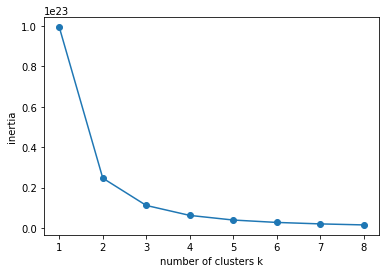

In [18]:
from sklearn.cluster import KMeans

ks = range(1,9)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_num)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
    

#### Create KMeans model with 3 clusters

In [19]:
model = KMeans(n_clusters=3)
model.fit(df_num)
labels = model.predict(df_num)

In [20]:
#compute covariance matrix
#check distance with centroid

In [ ]:
#for each hcpcs frequency - 
#1. Total 
#2. Sort on HCPCS 
#3. PICK top HCPS - total amount what percentage representing; number of beneficiary
#4. Find all patients with the HCPS - random sample on that
#5. transpose data so each hcps has a average 